## Домашнее задание по теме "Ансамблирование"

***Задачи:***   
    1. построить случайный лес, вывести важность признаков  
    2. обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную и 1 нелинейную модель

***План работы:***  
    1. Изучить данные и предобработать данные    
    2. Обучить модель случайного леса, вывести важность признаков  
    3. Обучить стекинг минимум из 3х моделей  
    4. Написать выводы

### Шаг 1. Изучение и предобработка данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import make_scorer
%matplotlib inline
jtplot.style()

In [3]:
houses = pd.read_csv('train.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Итак, у нас датасет из 1460 строк и 81 колонки. Не все колонки заполнены на 100%. Чтобы было проще увидеть, какие колонки имеют пропуски, выведем их:

In [5]:
empty_df = pd.DataFrame()
column = []
empty_values = []
type_column = []
for i in houses.columns:
    if houses[i].isna().sum() < 1:
        continue
    else:
        column.append(i)
        empty_values.append(houses[i].isna().sum())
        type_column.append(houses[i].dtypes)
        print('Столбец: ', '\x1b[1;0346m'+'{} '.format(i) +'\x1b[0m', 'всего пропусков: ', '\x1b[1;0346m'+'{}'.format(houses[i].isna().sum()) +'\x1b[0m')
empty_df['Столбец'] = column
empty_df['Пропущено значений'] = empty_values
empty_df['Тип данных'] = type_column

Столбец:  LotFrontage  всего пропусков:  259
Столбец:  Alley  всего пропусков:  1369
Столбец:  MasVnrType  всего пропусков:  8
Столбец:  MasVnrArea  всего пропусков:  8
Столбец:  BsmtQual  всего пропусков:  37
Столбец:  BsmtCond  всего пропусков:  37
Столбец:  BsmtExposure  всего пропусков:  38
Столбец:  BsmtFinType1  всего пропусков:  37
Столбец:  BsmtFinType2  всего пропусков:  38
Столбец:  Electrical  всего пропусков:  1
Столбец:  FireplaceQu  всего пропусков:  690
Столбец:  GarageType  всего пропусков:  81
Столбец:  GarageYrBlt  всего пропусков:  81
Столбец:  GarageFinish  всего пропусков:  81
Столбец:  GarageQual  всего пропусков:  81
Столбец:  GarageCond  всего пропусков:  81
Столбец:  PoolQC  всего пропусков:  1453
Столбец:  Fence  всего пропусков:  1179
Столбец:  MiscFeature  всего пропусков:  1406


Всё еще не очень видно. Отсортируем значения:

In [6]:
empty_df.sort_values(by='Пропущено значений', ascending=False)

,Столбец,Пропущено значений,Тип данных
16,PoolQC,1453,object
18,MiscFeature,1406,object
1,Alley,1369,object
17,Fence,1179,object
10,FireplaceQu,690,object
0,LotFrontage,259,float64
11,GarageType,81,object
12,GarageYrBlt,81,float64
13,GarageFinish,81,object
14,GarageQual,81,object


In [7]:
del empty_df

Больше всего пропусков в столбце "PoolQC". Чуть лучше ситуация в "MiscFeature", далее - "Alley" и, наконец,"Fence". Остальные столбцы выглядят лучше, чем эти. Во всяком случае, шанс вставить пропущенные значения есть. Здесь же стоит посмотреть, что это за столбцы, насколько они нужны и стоит ли вообще их восстанавливать.  

Начнем со столбца "PoolQC". Исходя из информации в текстовом файле с описанием столбцов, этот столбец назван как "Качество бассейна", где оно имеет градацию от "прекрасно" до "нет бассейна". Всего должно быть 5 значений. Проверим:

In [8]:
houses['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

Всего 4, одно из которых "nan". Скорее всего пропуск и обозначает, что бассейна в доме нет. Действительно, бассейн - не частый атрибут дома. Здесь nanЫ можно заменить на "no". Проверим остальные столбцы типа "объект":

In [9]:
houses['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

Итак, в этом столбце встречаются те отличительные черты домов, что не попали в другие столбцы. Так, например, здесь есть 2-й гараж, навес, теннисный корт, элеватор и др. Поскольку такие вещи встречаются тоже не очень часто - заменим пропуски на "no" - то есть нет прочих функций, дом стандартный. Тоже заменим на "no".

Alley - Тип подъездной аллеи к объекту.

In [10]:
houses['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

И последний столбец с гигантским количеством пропусков - Fence:

In [11]:
houses['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

Мы видим, что все обозначения из описани здесь присутствуют. В их числе есть и  NA - т.е. No Fence. Нет ограждения. Тоже заменим пропуски на "no".

In [12]:
houses['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

Это качество камина. Пропуски в данном случае тоже обозначают его отсутствие. Так и написано в описании:  NA = No Fireplace. Заменим на "no".

Столбец "GarageType" тоже категориальный. Возможно, тот 81 пропуск - это отсутствие гаража? Проверим:

In [13]:
houses['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

Точно. Заполним пропуски "no". Что дальше?

GarageFinish - отделка гаража. Закончена, черновая, не закончена, нет гаража:

In [14]:
houses['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

Аналогично заменим.

In [15]:
houses['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

"Наны" здесь тоже вернее всего - отсутствие гаража. Не даром пропусков везде одинаковое количество.

In [16]:
houses['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

Та же ситуация.  
Теперь проверим информацию о гаражах во избежание ошибки: действительно ли пропуски находятся в одинаковых строчках:

In [17]:
no_garage = houses[houses['GarageFinish'].isna()]
print(len(no_garage))

81


In [18]:
for i in ['GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond']:
    print(i, no_garage[i].unique())
    print()

GarageType [nan]

GarageYrBlt [nan]

GarageQual [nan]

GarageCond [nan]



In [19]:
del no_garage

Действительно пропуски в одних и тех же строчках. Также стоит отметить столбец "GarageYrBlt". то год постройки гаража. Если гаража нет, то и год, соответственно, проставить нельзя. Заменим в этом столбце пропуски на ноль:

In [20]:
houses['GarageYrBlt'] = houses['GarageYrBlt'].fillna(0)

Теперь заменим пропуски во всех вышеобозначенных столбцах на 'no':

In [21]:
houses[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageType','GarageQual', 'GarageCond']] = houses[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageType','GarageQual', 'GarageCond']].fillna('no')

Какие колонки еще остались с пропусками?

In [22]:
print([i for i in houses.columns if houses[i].isna().sum() > 0])

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']


Посмотрим колонки с подвалами:

In [23]:
houses['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

Здесь тоже так и просится замена на "no".

In [24]:
houses['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

Пропусков столько же, сколько и в предыдущем столбце. Речь также идет о цокольном этаже. Видимо, пропуск - это отсутствие подвала. Но всё же перепроверим:

In [25]:
houses['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [26]:
houses['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [27]:
houses['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

А тут уже интересно: почему у этих трех столбцов пропусков на один меньше, чем у первых двух? Посмотрим, что там не так:

In [28]:
Bsmt = houses[['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond']]
Bsmt[Bsmt['BsmtExposure'].isna()]

,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


В 4-х столбцах есть значения, в первом нет. Еще раз посчитаем кол-во "нанов":

In [29]:
Bsmt.isna().sum()

BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
dtype: int64

Удивительно. Что же с ними не так? Отсортируем теперь по другому столбцу:

In [30]:
Bsmt[Bsmt['BsmtFinType2'].isna()]

,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
332,No,GLQ,NaN,Gd,TA
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN


In [31]:
del Bsmt

Вот, где ошибка: 332 строчка. Посмотрим, что можно сделать в данном случае.

In [32]:
houses[(houses['BsmtExposure'] == 'No') & (houses['BsmtFinType1'] == 'GLQ') & (houses['BsmtQual'] == 'Gd') & (houses['BsmtCond'] == 'TA')]['BsmtFinType2'].value_counts()

Unf    126
Rec      1
LwQ      1
Name: BsmtFinType2, dtype: int64

Наиболее частое значение в данном случае - Unf (Незаконченный). Заменим модой этот пропуск.

In [33]:
houses['BsmtFinType2'][332] = 'Unf'

In [34]:
houses['BsmtFinType2'].isna().sum()

37

Теперь посмотрим еще на один пропуск: это строка 948. В ней в столбцах "BsmtFinType1" и "BsmtFinType2" значение "Unf", а в столбце "BsmtExposure" - пропуск. 

In [35]:
houses[(houses['BsmtFinType1'] == 'Unf') & (houses['BsmtFinType2'] == 'Unf') & (houses['BsmtQual'] == 'Gd') & (houses['BsmtCond'] == 'TA')]['BsmtExposure'].value_counts()

No    136
Av     26
Mn     10
Gd      5
Name: BsmtExposure, dtype: int64

Наиболее частое значение "No". Заменим им:

In [36]:
houses['BsmtExposure'][948]

nan

In [37]:
houses['BsmtExposure'][948] = 'No'

In [38]:
houses['BsmtExposure'][948]

'No'

Еще раз посчитаем пропуски:

In [39]:
houses[['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond']].isna().sum()

BsmtExposure    37
BsmtFinType1    37
BsmtFinType2    37
BsmtQual        37
BsmtCond        37
dtype: int64

Меняем пропуски на "no_basement":

In [40]:
houses[['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond']] = houses[['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond']].fillna("no_basement")

In [41]:
print([i for i in houses.columns if houses[i].isna().sum() > 0])

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical']


'MasVnrType' (8 пропусков) и 'Electrical' (1 пропуск) - столбцы типа "объект". Посмотрим, что у них за пропуски:

In [42]:
houses[houses['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,no,Reg,Lvl,AllPub,...,0,no,no,no,0,5,2008,WD,Normal,167500


Тип электрической системы. Посмотрим наиболее частое значение и заменим им:

In [43]:
houses['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Итак, чаще всего встречается стандартная. Заменим ей:

In [44]:
houses['Electrical'] = houses['Electrical'].fillna('SBrkr')

In [45]:
houses['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

Тип облицовки кладки. Посмотрим наиболее популярное значение:

In [46]:
houses['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Облицовки, как правило, нет. Посмотрим еще на один столбец. В нем столько же пропусков. Думаю, они связаны:

In [47]:
houses['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

Площадь облицовки каменной кладкой в квадратных футах. В большинстве своем облицовки нет, поэтому и площадь ее равна 0. Не везде, но более чем в 90% случаев. Заменяем пропуски в "MasVnrArea" на 0.0, а в "MasVnrType"  на "None", но и само это значение после заменим на "No":

In [48]:
houses['MasVnrType'] = houses['MasVnrType'].fillna('None')

In [49]:
len(houses[houses['MasVnrType'] == 'None'])

872

In [50]:
houses.loc[houses['MasVnrType'] == 'None', 'MasVnrType'] = 'No'

In [51]:
houses['MasVnrType'].value_counts()

No         872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [52]:
houses['MasVnrArea'] = houses['MasVnrArea'].fillna(0.0)

In [53]:
print([i for i in houses.columns if houses[i].isna().sum() > 0])

['LotFrontage']


И последний столбец: LotFrontage. Он содержит числовые данные.

In [54]:
houses['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

Чем его заменим? Пропусков довольно много. Посмотрим на распределение значений:

Boxplot LotFrontage


<AxesSubplot:xlabel='LotFrontage'>

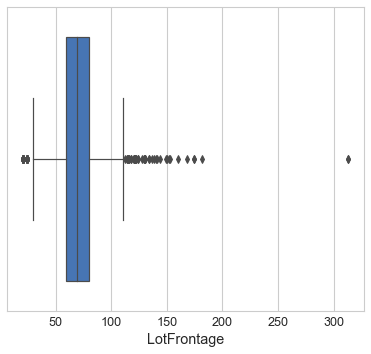

In [55]:
print('\x1b[1;0346m'+'Boxplot {}'.format('LotFrontage') +'\x1b[0m')
sns.boxplot(x=houses['LotFrontage'])

Distplot LotFrontage


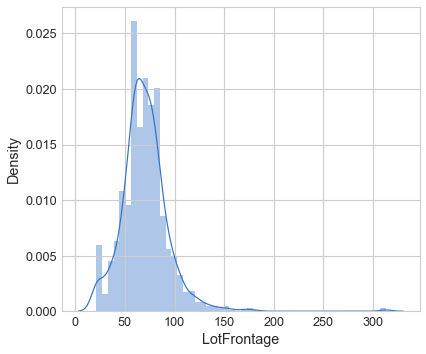

In [56]:
print('\x1b[1;0346m'+'Distplot {}'.format('LotFrontage')+'\x1b[0m')
sns.distplot(houses['LotFrontage'])
plt.show()

Выброс только один, но не он нас сейчас волнует. На гистограмме видно, что, в принципе, распределение похоже на нормальное. Да, есть ряд значений, представленный несколько чаще, чем при нормальном распределении, но, тем не менее, значения можно предсказать. В таком случае возьмем линейную регрессию для заполнения пропусков:

Выберем столбцы, с помощью которых будем предсказывать:

In [57]:
LotFrontage = houses[['LotShape', 'LotArea', 'Street', 'LotConfig', 'Neighborhood', 'LandSlope', 'LotFrontage']]
LotFrontage.head()

,LotShape,LotArea,Street,LotConfig,Neighborhood,LandSlope,LotFrontage
0,Reg,8450,Pave,Inside,CollgCr,Gtl,65.0
1,Reg,9600,Pave,FR2,Veenker,Gtl,80.0
2,IR1,11250,Pave,Inside,CollgCr,Gtl,68.0
3,IR1,9550,Pave,Corner,Crawfor,Gtl,60.0
4,IR1,14260,Pave,FR2,NoRidge,Gtl,84.0


In [58]:
LotFrontage_data = pd.get_dummies(LotFrontage.loc[ :, ['LotShape', 'Street', 'LotConfig', 'Neighborhood', 'LandSlope']], columns = ['LotShape', 'Street', 'LotConfig', 'Neighborhood', 'LandSlope'] )
LotFrontage_data['LotArea'] = houses['LotArea']
LotFrontage_data['LotFrontage'] = houses['LotFrontage']
LotFrontage_data.head()

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Grvl,Street_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotArea,LotFrontage
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,8450,65.0
1,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,9600,80.0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,11250,68.0
3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,9550,60.0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,14260,84.0


In [59]:
X_train = LotFrontage_data.dropna()
X_train = X_train.drop('LotFrontage', axis=1)
X_train.shape

(1201, 40)

In [60]:
X_test = LotFrontage_data[LotFrontage_data['LotFrontage'].isna()]
X_test = X_test.drop('LotFrontage', axis=1)
X_test.shape

(259, 40)

In [61]:
y_train = LotFrontage_data['LotFrontage'].dropna()
y_train.shape

(1201,)

In [62]:
y_test = LotFrontage_data.loc[LotFrontage_data[LotFrontage_data['LotFrontage'].isna()].index, 'LotFrontage']
y_test.shape

(259,)

In [64]:
linreg = LinearRegression().fit(X_train,y_train)
LotFrontage_data.loc[LotFrontage_data[LotFrontage_data['LotFrontage'].isna()].index, 'LotFrontage'] = linreg.predict(X_test).round()

In [65]:
LotFrontage_data['LotFrontage'][155:170]

155     60.0
156     60.0
157     92.0
158    100.0
159    134.0
160     40.0
161    110.0
162     95.0
163     55.0
164     40.0
165     62.0
166     78.0
167     86.0
168     62.0
169     91.0
Name: LotFrontage, dtype: float64

In [66]:
houses['LotFrontage'][155:170]

155     60.0
156     60.0
157     92.0
158    100.0
159    134.0
160      NaN
161    110.0
162     95.0
163     55.0
164     40.0
165     62.0
166      NaN
167     86.0
168     62.0
169      NaN
Name: LotFrontage, dtype: float64

In [67]:
houses['LotFrontage'] = LotFrontage_data['LotFrontage']

In [68]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Все пробелы заполнены.

Еще у нас есть один столбец, который не несет никакой смысловой информации - это "Id". На всякий случай выведем его:

In [69]:
houses['Id'].unique()

array([   1,    2,    3, ..., 1458, 1459, 1460], dtype=int64)

Да, действительно это столбец с порядковыми номерами. Для обучения он нам не пригодится. Удалим его:

In [70]:
houses = houses.drop('Id', axis=1)
houses.shape

(1460, 80)

Всё. Теперь можно переходить к следующему этапу.

Для того, чтобы обучить модели, необходимо подготовить признаки: перевести категориальные признаки в числовой формат (причем нужно будет воспользоваться техникой OHE, поскольку у нас будет использоваться как минимум одна линейная модель); отмасштабировать признаки. Этим и займемся:

Для начала разделим признаки на качественные и количественные. Первые нам слеует перевести техникой OHE, а вторые - нормализовать:

In [71]:
obj = []
num = []

for i in houses.columns:
    if houses[i].dtype == 'object':
        obj.append(i)
    else:
        num.append(i)

In [72]:
obj

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [73]:
num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [74]:
len(obj) + len(num)

80

In [75]:
houses[obj]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,no,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,no,no,no,WD,Normal
1,RL,Pave,no,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,no,no,no,WD,Normal
2,RL,Pave,no,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,no,no,no,WD,Normal
3,RL,Pave,no,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,no,no,no,WD,Abnorml
4,RL,Pave,no,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,no,no,no,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,no,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,no,no,no,WD,Normal
1456,RL,Pave,no,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,no,MnPrv,no,WD,Normal
1457,RL,Pave,no,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,no,GdPrv,Shed,WD,Normal
1458,RL,Pave,no,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,no,no,no,WD,Normal


Теперь закодируем качественные признаки:

In [76]:
houses = pd.get_dummies(houses, drop_first=True)
houses.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


Теперь разделим выборку на трейн и тест, а далее - нормализуем признаки количественные:

In [77]:
features = houses.drop('SalePrice', axis=1)
target = houses['SalePrice']
features.shape, target.shape

((1460, 259), (1460,))

In [78]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=12345)

In [79]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((1022, 259), (438, 259), (1022,), (438,))

In [80]:
scaler = StandardScaler()
scaler.fit(features_train[num[:-1]])
features_train[num[:-1]] = scaler.transform(features_train[num[:-1]])
features_test[num[:-1]] = scaler.transform(features_test[num[:-1]])
features_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
986,-0.173601,-0.476036,-0.505872,-0.092028,2.115511,-2.013756,0.838459,-0.569319,-0.967854,-0.27864,...,0,0,0,0,1,0,0,0,1,0
411,3.086090,1.193437,2.319140,-0.799188,-0.526508,-0.541447,-1.501347,-0.569319,1.305884,-0.27864,...,0,0,0,0,1,0,0,0,1,0
1123,-0.872106,-0.842506,-0.111583,-0.799188,2.996184,-0.803191,1.082189,-0.569319,-0.967854,-0.27864,...,0,0,0,0,1,0,0,0,1,0
17,0.757739,0.053309,0.021868,-1.506348,-0.526508,-0.148832,-0.916396,-0.569319,-0.967854,-0.27864,...,0,0,0,0,1,0,0,0,1,0
792,0.059234,0.867686,-0.061996,0.615132,-0.526508,0.799989,0.545984,-0.569319,0.888170,-0.27864,...,0,0,0,0,1,0,0,0,1,0


Признаки готовы, можно обучать:

## Обучение модели случайного леса

RMSE for RandomForestRegressor:  28293.93014105846


Text(0.5, 1.0, 'Feature importance using RandomForestRegressor Model')

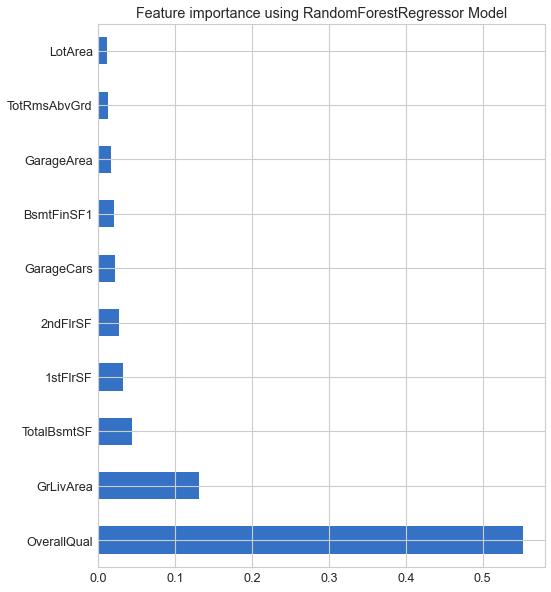

In [81]:
rfr = RandomForestRegressor().fit(features_train, target_train)
rfr_predict = rfr.predict(features_test)
mse = mean_squared_error(target_test, rfr_predict)   
print('RMSE for RandomForestRegressor: ', np.sqrt(mse))

rfr_coef = pd.Series(rfr.feature_importances_, index = features_train.columns)
rfr_imp_coef = rfr_coef.sort_values(ascending=False)
rfr_imp_coef = rfr_imp_coef[:10]

plt.rcParams['figure.figsize'] = (8.0, 10.0)
rfr_imp_coef.plot(kind = "barh")
plt.title("Feature importance using RandomForestRegressor Model")

Подводим итог: наиболее важный признак - внешний вид дома (отделка и материалы). На втором месте - общая площадь надземных жилых помещений в квадратных футах.  
При этом отметим, что мы не использовали никакие гиперпараметры, а просто обучили модель. Можно попробовать перебрать гиперпараметры и определить, какие признаки будут наиболее значимыми в таком случае:

In [82]:
param_rfr = {'max_depth': np.arange(2, 21, 2), 
             'n_estimators': np.arange(50, 300, 10),
            'min_samples_split': np.arange(2, 13, 2)}

ВНИМАНИЕ! Следующая ячейка выполняется более 5 часов:

In [113]:
%%time
scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid = GridSearchCV(rfr, param_rfr, scoring=scorer, cv=8)
grid.fit(features_train, target_train)
print(grid.best_params_)

{'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 70}
Wall time: 5h 6min 1s


RMSE for RandomForestRegressor:  27551.050328253106


Text(0.5, 1.0, 'Feature importance using RandomForestRegressor Model')

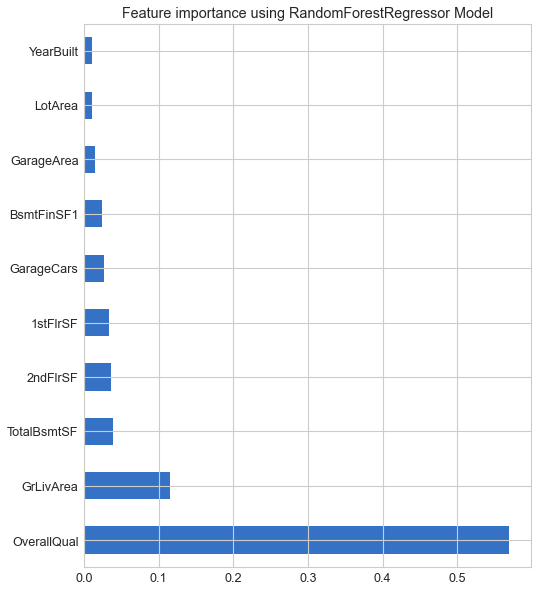

In [83]:
rfr = RandomForestRegressor(max_depth=16, min_samples_split=2, n_estimators=70, random_state=12345).fit(features_train, target_train)
rfr_predict = rfr.predict(features_test)
mse = mean_squared_error(target_test, rfr_predict)   
print('RMSE for RandomForestRegressor: ', np.sqrt(mse))

rfr_coef = pd.Series(rfr.feature_importances_, index = features_train.columns)
rfr_imp_coef = rfr_coef.sort_values(ascending=False)
rfr_imp_coef = rfr_imp_coef[:10]

plt.rcParams['figure.figsize'] = (8.0, 10.0)
rfr_imp_coef.plot(kind = "barh")
plt.title("Feature importance using RandomForestRegressor Model")

Не сильно меньше стала наша ошибка, но тем не менее гиперпараметры своё отработали. Пятерка наиболее значимых признаков не поменялась. А вот чуть менее значимые признаки изменились. Тем не менее, попробуем ничего не менять и обучим стекинг из нескольких моделей на этих данных:

## Шаг 3. Обучение стекинга из нескольких моделей

In [84]:
regressor = StackingRegressor(
    [   ('lr', RidgeCV()),                                                        # l2
        ('svr', LinearSVR(random_state=12345)),                                   # метод опорных векторов в линейной регрессии
        ('dtr', DecisionTreeRegressor(random_state=12345)),                       # дерево
        ('rfr', RandomForestRegressor(max_depth=16, 
                                      min_samples_split=2, 
                                      n_estimators=70, 
                                      random_state=12345))], LinearRegression())  # лес (возьмем с уже подобранными параметрами)

In [87]:
regressor.fit(features_train, target_train)

StackingRegressor(estimators=[('lr', RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('svr', LinearSVR(random_state=12345)),
                              ('dtr',
                               DecisionTreeRegressor(random_state=12345)),
                              ('rfr',
                               RandomForestRegressor(max_depth=16,
                                                     n_estimators=70,
                                                     random_state=12345))],
                  final_estimator=LinearRegression())

Теперь предскажем каждой моделью в отдельности:

In [88]:
y_pred_lr = regressor.named_estimators_['lr'].predict(features_test)
y_pred_svr = regressor.named_estimators_['svr'].predict(features_test)
y_pred_dtr = regressor.named_estimators_['dtr'].predict(features_test)
y_pred_rfr = regressor.named_estimators_['rfr'].predict(features_test)

И стекингом:

In [89]:
y_pred = regressor.predict(features_test)

Сравним показатели:

In [90]:
mse_lr = mean_squared_error(target_test, y_pred_lr)   
print('RMSE for RidgeCV: ', np.sqrt(mse_lr))

mse_svr = mean_squared_error(target_test, y_pred_svr)   
print('RMSE for LinearSVR: ', np.sqrt(mse_svr))

mse_dtr = mean_squared_error(target_test, y_pred_dtr)   
print('RMSE for DecisionTreeRegressor: ', np.sqrt(mse_dtr))

mse_rfr = mean_squared_error(target_test, y_pred_rfr)   
print('RMSE for RandomForestRegressor: ', np.sqrt(mse_rfr))

mse_regression = mean_squared_error(target_test, y_pred)   
print('RMSE for StackingRegressor: ', np.sqrt(mse_regression))

result = pd.DataFrame()

result['Model'] = ['RidgeCV', 'LinearSVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'StackingRegressor']
result['RMSE'] = [mse_lr, mse_svr, mse_dtr, mse_rfr, mse_regression]

RMSE for RidgeCV:  28346.57303957379
RMSE for LinearSVR:  163544.4150031327
RMSE for DecisionTreeRegressor:  37752.08709504633
RMSE for RandomForestRegressor:  27551.050328253106
RMSE for StackingRegressor:  27138.7629032457


Построим гистограмму и посмотрим, показатель какой модели лучше:

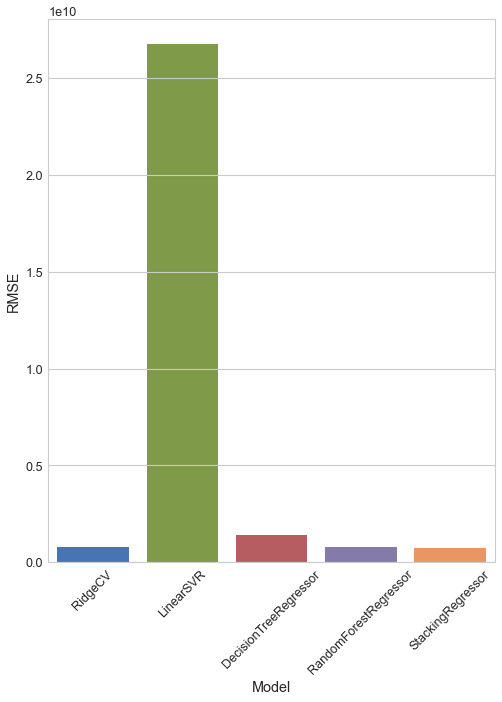

In [91]:
sns.barplot(x='Model', y='RMSE', data=result)
plt.tick_params(axis='x', rotation=45)

Не очень хорошо видно победителя. Уберем самое большое значение - LinearSVR:

In [92]:
result = result[result['Model'] != 'LinearSVR']
result

,Model,RMSE
0,RidgeCV,8.035282e+08
2,DecisionTreeRegressor,1.425220e+09
3,RandomForestRegressor,7.590604e+08
4,StackingRegressor,7.365125e+08


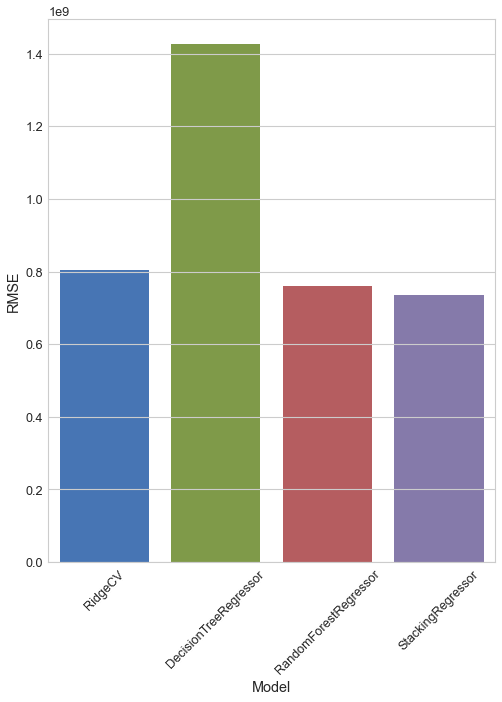

In [93]:
sns.barplot(x='Model', y='RMSE', data=result)
plt.tick_params(axis='x', rotation=45)

Теперь видно, что ансамблевая модель показала лучший результат. Посмотрим на коэффициенты объединяющей линейной регрессии:

<AxesSubplot:>

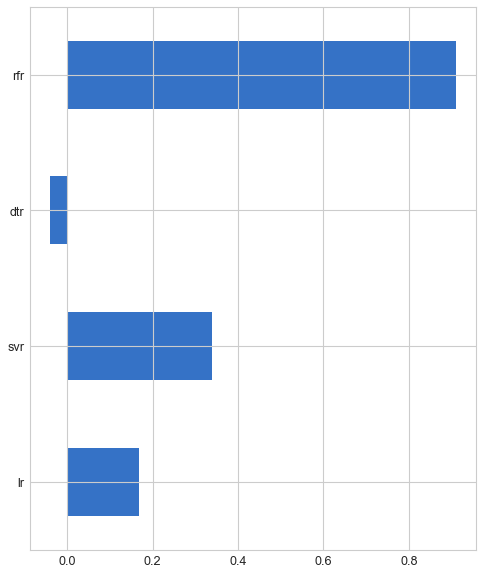

In [94]:
pd.Series(regressor.final_estimator_.coef_.flatten(), index=regressor.named_estimators_.keys()).plot(kind='barh')

Итак, получается, стекинг моделей "вытянул" случайный лес.

## Выводы

Таким образом, в данной работе реализованы следующие задачи:  
    - осуществлена предобработка данных: все пропуски заменены подходящими значениями, данные имеют нужный тип, отмасштабированы и перекодированы.  
    - построена модель случайного леса, подобраны гиперпараметры, выведены наиболее важные признаки.  
    - обучен стекинг 4 моделей; использованы 2 линейные и 2 нелинейные модели.  
    
В итоге эксперимента оказалось, что стекинговая модель лучше справилась с задачей предсказания стоимости недвижимости. При этом наиболее значимым стало предсказание модели случайного леса в стекинге.